In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, f
import numpy as np
import statsmodels.api as sm
from Linear_Reg_Diagnostic import Linear_Reg_Diagnostic
import statsmodels.stats.outliers_influence as smoi

In [2]:
tomasetti = pd.read_csv("https://stats191.stanford.edu/data/Tomasetti.csv")


In [19]:
tomasetti.head()

,Type,Risk,Lscd,Cluster
0,Acute myeloid leukemia,0.0041,1.300000e+11,Replicative
1,Basal cell carcinoma,0.3000,3.550000e+12,Deterministic
2,Chronic lymphocytic leukemia,0.0052,1.300000e+11,Replicative
3,Colorectal adenocarcinoma,0.0480,1.170000e+12,Deterministic
4,Colorectal adenocarcinoma with FAP,1.0000,1.170000e+12,Deterministic


1:

In [34]:
formula = 'np.log(Risk) ~ np.log(Lscd) + np.log(Lscd):Cluster'
model = sm.OLS.from_formula(formula, tomasetti)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(Risk)   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     70.46
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.18e-11
Time:                        14:15:39   Log-Likelihood:                -48.106
No. Observations:                  31   AIC:                             102.2
Df Residuals:                      28   BIC:                             106.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

2:

In [35]:
y_pred = result.predict()

In [36]:
result.params['Intercept']

-14.66296334668457

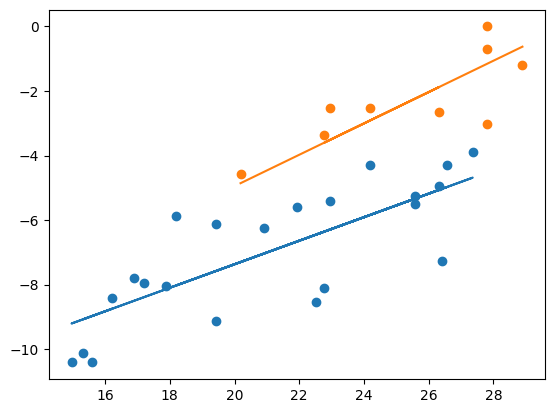

In [37]:
is_R = tomasetti['Cluster'] == 'Replicative'
plt.plot(np.log(tomasetti['Lscd'][is_R]), y_pred[is_R])
plt.scatter(np.log(tomasetti['Lscd'][is_R]), np.log(tomasetti['Risk'][is_R]))
plt.plot(np.log(tomasetti['Lscd'][~is_R]), y_pred[~is_R])
plt.scatter(np.log(tomasetti['Lscd'][~is_R]), np.log(tomasetti['Risk'][~is_R]))

plt.show()

3:

In [39]:
f_test = result.f_test('np.log(Lscd):Cluster[T.Replicative] = 0')
print(f_test)

<F test: F=31.741981355997957, p=4.921633985379364e-06, df_denom=28, df_num=1>


4:

yes, we can see that there is an improtence to this clustering.